 <h1><center>Metagenomic Analysis in R</center></h1>
 <h2><center>Qidong Jia</center></h2>
 <h3><center>UNL Bioinformatics Core Research Facility (BCRF)</center></h3>
 <h4><center>03/23/2018</center></h4>

## Set computing environment

### Changing your library location

In [1]:
.libPaths()

[1] "/home/swanson/cathrine98/R/x86_64-pc-linux-gnu-library/3.4"        
[2] "/home/swanson/cathrine98/.conda/envs/qiime2_workshop/lib/R/library"

In [2]:
.libPaths("~/.conda/envs/qiime2_workshop/lib/R/library/")

In [3]:
.libPaths()

[1] "/home/swanson/cathrine98/.conda/envs/qiime2_workshop/lib/R/library"

### Set Working Directory
All the datasets needed for this part is located in your **WORK** directory.

The full path is: ***$WORK/qiime2-tut/phyloseq_db***

**Most likely you are already in the right directory.**

First run the **getwd()** command to get your current working directory:


In [4]:
getwd()

[1] "/lustre/work/swanson/cathrine98/qiime2_workshop_2018/jj_tutorial/phyloseq_db"

In [5]:
# Change to our data directory. 
# setwd("$WORK/qiime2-tut/phyloseq_db") # replace $WORK with the full path
# getwd() # Check again

In [6]:
# list all the files under our data directoy
list.files()

[1] "biom-taxonomy.tsv"        "dna-sequences.fasta"     
 [3] "feature-table.biom"       "pre_env"                 
 [5] "qiime2_R_final.ipynb"     "soil-metadata.tsv"       
 [7] "table-with-taxonomy.biom" "table-with-taxonomy.tsv" 
 [9] "taxonomy.tsv"             "tree.nwk"

### Load required packages

We'll use **Phyloseq** today. It uses available R packages to do the analysis, for example: vegan, ape and ggplot2.

All the packages are already included  in the conda environemt you just installed. So, we just need to load them into the environment.

There is also a R package called **tidyverse**, which includes a list of R packages for data science.

In [7]:
# Load required packages
library(phyloseq)
#library(ggplot2)
library(tidyverse)
#library(vegan)

Warning message:
“Installed Rcpp (0.12.11) different from Rcpp used to build dplyr (0.12.10).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


### Introduction
*The phyloseq package is a tool to import, store, analyze, and graphically display complex phylogenetic sequencing data that has already been clustered into Operational Taxonomic Units (OTUs), especially when there is associated sample data, phylogenetic tree, and/or taxonomic assignment of the OTUs.*
![](http://journals.plos.org/plosone/article/figure/image?size=medium&id=info:doi/10.1371/journal.pone.0061217.g003)

In [8]:
# Show the help documentation for the function import_qiime()
?import_qiime

In [9]:
?plot_bar

### import functions and required files

The biom files generated by QIIME2 does not include the taxonomy. So, we need to create a new one. Phyloseq needs the following five datasets to create a phyloseq object:
* otu_table -> **feature-table.biom**
* sam_data -> **soil-metadata.tsv**
* tax_table -> **taxonomy.tsv**
* phy_table -> **tree.nwk**
* refseq -> **dna-sequences.fasta**

There files are in the *.qza file, you need unzip them first to get them.

we will use the "import_qiime" to load the data

### Import data and create the phyloseq object

In [10]:
?import_qiime

In [11]:
# Prepare file paths
baseDir <- getwd() #make sure you are in the right directory
otufile <- paste(baseDir, "table-with-taxonomy.tsv", sep = "/")
mapfile <- paste(baseDir, "soil-metadata.tsv", sep = "/")
treefile <- paste(baseDir, "tree.nwk", sep = "/")
refseqfile <- paste(baseDir, "dna-sequences.fasta", sep = "/")

In [13]:
otufile

[1] "/lustre/work/swanson/cathrine98/qiime2_workshop_2018/jj_tutorial/phyloseq_db/table-with-taxonomy.tsv"

In [14]:
# Create a phyloseq object using import_qiime() function
myData <- import_qiime(otufile, mapfile, treefile, refseqfile)

Processing map file...
Processing otu/tax file...
Reading file into memory prior to parsing...
Detecting first header line...
Header is on line 2  
Converting input file to a table...
Defining OTU table... 
Parsing taxonomy table...
Processing phylogenetic tree...
 /lustre/work/swanson/cathrine98/qiime2_workshop_2018/jj_tutorial/phyloseq_db/tree.nwk ...
Processing Reference Sequences...


### Take a look at the data

In [15]:
myData

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2145 taxa and 414 samples ]
sample_data() Sample Data:       [ 414 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 2145 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2145 tips and 1999 internal nodes ]
refseq()      DNAStringSet:      [ 2145 reference sequences ]

### Accessors
![](http://journals.plos.org/plosone/article/figure/image?size=medium&id=info:doi/10.1371/journal.pone.0061217.g003)

In [16]:
tax_table(myData) %>% head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species
924e0bdd462b3d25c9cddb61d24e1802,Bacteria,NA,NA,NA,NA,NA,NA
25bf4e798f1f4946f794813a20f5db54,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
8a50305e068b1706d336e3f63a6e472c,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
dfd57190dfbca66b5e1145d14206a7b9,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
a26b947c74bc10220f0fbeec4b0687c1,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
764bf4e55d7b3f427c4ab04f2f371df5,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA


### Accessors

In [17]:
sample_data(myData) %>% count(Type)

Type,n
bulk soil,30
rhizosphere,192
root,192


In [18]:
get_variable(myData, "Type") %>% unique()

[1] rhizosphere root        bulk soil  
Levels: bulk soil rhizosphere root

### Are there any samples with zero read counts?

In [20]:
any(sample_sums(myData) == 0)
sum(sample_sums(myData) == 0)

[1] TRUE

[1] 5

In [21]:
prune_samples(sample_sums(myData) == 0, myData) %>% sample_names()

[1] "RHZ017"  "RHZ081"  "RHZ088"  "RHZ142"  "soil025"

### Are there species with zero read counts?

In [22]:
any(taxa_sums(myData) == 1)
sum(taxa_sums(myData) == 1)

[1] TRUE

[1] 1

In [23]:
prune_taxa(taxa_sums(myData) == 1, myData) %>% tax_table()

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”

,Kingdom,Phylum,Class,Order,Family,Genus,Species
2b4a64bff5a317491f08de235db6f064,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Sinobacteraceae,NA,NA


### Output phyloseq object into a dataframe

In [24]:
# combine your phyloseq object into a dataframe, so you can 
# use it to make graphics with ggplot2.
myDataMdf <- psmelt(myData)

In [25]:
myDataMdf %>% head()

,OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,ReversePrimer,Genotype,Replicate,Type,⋯,Time,NitrogenLevel,Description,Kingdom,Phylum,Class,Order,Family,Genus,Species
530176,9800909a1c3f6babe29cbb81b1e6af1f,soil021,664,soil021,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,,1,bulk soil,⋯,72,high,soil_021,Archaea,Crenarchaeota,Thaumarchaeota,Nitrososphaerales,Nitrososphaeraceae,Candidatus Nitrososphaera,SCA1170
116765,20f431abc282980af289ad86a11c4802,RHZ032,509,RHZ032,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,H,4,rhizosphere,⋯,40,high,RHZ_032,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Micrococcaceae,Arthrobacter,NA
614199,af236a041ff07c89bee42b8a89a4f40b,soil018,487,soil018,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,,3,bulk soil,⋯,53,low,soil_018,Archaea,Crenarchaeota,Thaumarchaeota,Nitrososphaerales,Nitrososphaeraceae,Candidatus Nitrososphaera,SCA1170
598811,ab5ea1a14b8b6a5c047668fa669be5dc,RHZ130,481,RHZ130,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,B,1,rhizosphere,⋯,72,high,RHZ_130,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Bradyrhizobium,NA
273469,4a76bc31add27e0f1d15cf21b6cc96be,RHZ132,473,RHZ132,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,D,1,rhizosphere,⋯,72,high,RHZ_132,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
238189,401713689cbb4a6aa6006599abc5f0ab,RHZ047,460,RHZ047,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,C,4,rhizosphere,⋯,40,low,RHZ_047,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Micrococcaceae,Arthrobacter,NA


### Preprocessing

### Sequence depths

In [26]:
# Create a two-column dataframe
myDataSDT = data.frame(TotalReads = sort(sample_sums(myData), TRUE), 
                       sorted = 1:nsamples(myData))

In [27]:
myDataSDT %>% head()

,TotalReads,sorted
root043,1530,1
root010,1499,2
root080,1433,3
RHZ187,1430,4
root064,1426,5
root104,1425,6


In [28]:
myDataSDT %>% summarise(TotalReads = sum(TotalReads))

TotalReads
299753


### Sequence depths
Create a bar plot to show the sequence depth at sample level

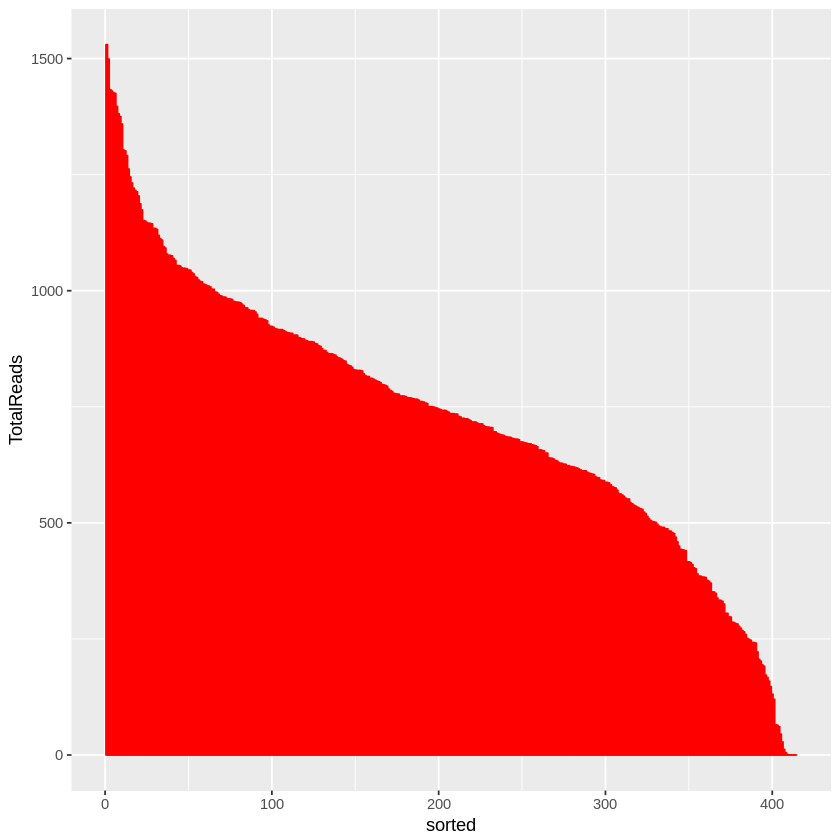

In [29]:
# Create a bar plot to show the sequence depth
ggplot(myDataSDT, aes(x = sorted, y = TotalReads)) + 
    geom_bar(color = "red", stat = "identity")

Create a histogram to show the sequence depth at sample level.

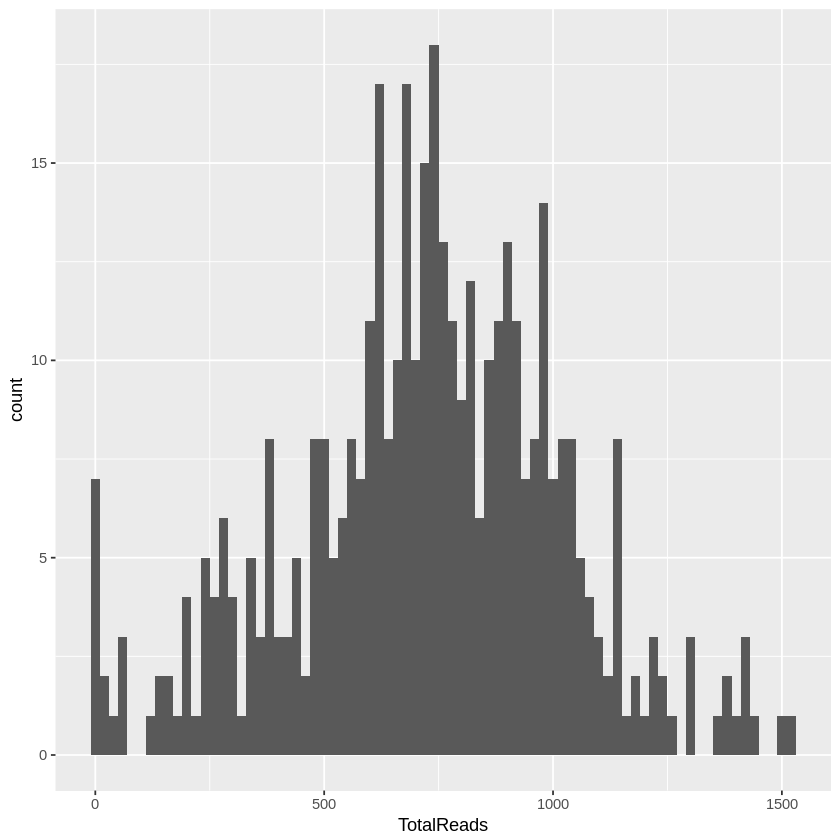

In [30]:
ggplot(myDataSDT, aes(TotalReads)) + geom_histogram(binwidth = 20)

### Taxa total counts 

In [31]:
myDataTTC = data.frame(nreads = sort(taxa_sums(myData), TRUE), 
                       sorted = 1:ntaxa(myData))

In [32]:
myDataTTC %>% head()

,nreads,sorted
0ed0a8060d7f87df7e88dd33c5ead231,16297,1
db9eedd11cf8d2976f50d17d54dbcac2,12214,2
e11f7d056597b63d3726b3b1204594fc,9406,3
2c49cb085cb3cbf5c8733823f4c869f9,9042,4
e05598250c47944eb4fd33d83b658af3,8987,5
489fe9acee55ad8a9c86244b96d923e0,8820,6


In [33]:
myDataTTC %>% summarise(TotalReads = sum(nreads))

TotalReads
299753


### Taxa total counts 
Create a bar plot to show read counts at taxa level

Warning message:
“Ignoring unknown parameters: title”

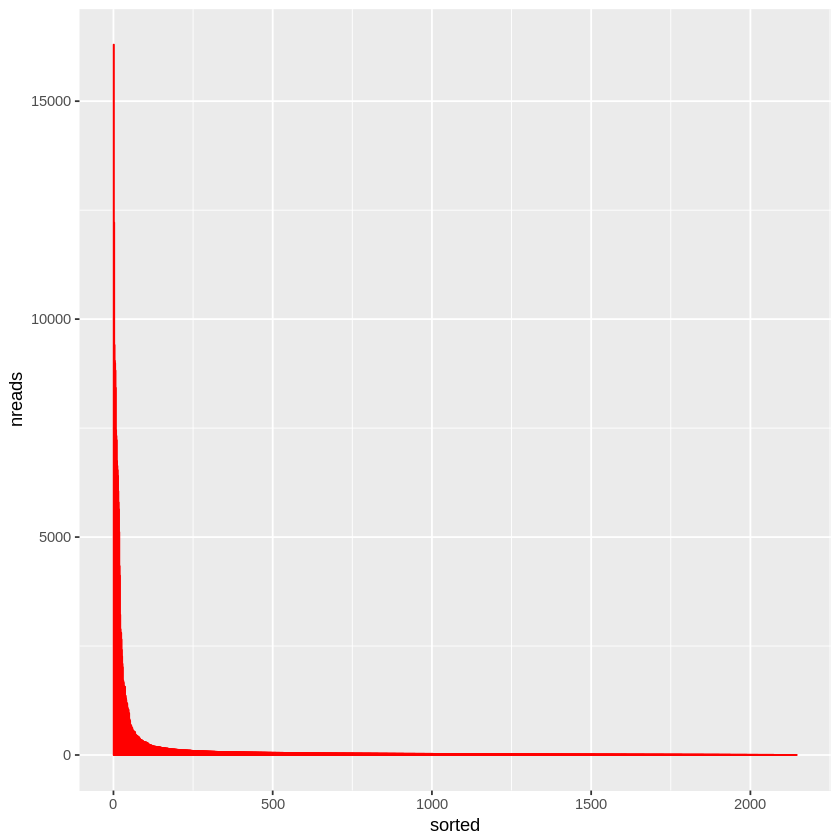

In [34]:
title = "Total number of reads"
ggplot(myDataTTC, aes(x = sorted, y = nreads)) + 
    geom_bar(color = "red", stat = "identity", title = title)

### Prevalence
prevalence in the dataset, which we will define here as the number of samples in which a taxon appears at least once

In [35]:
myDataPRE <- apply(otu_table(myData),
               MARGIN = 1, # rows
               FUN = function(x){sum(x > 0)})
head(myDataPRE)

924e0bdd462b3d25c9cddb61d24e1802 25bf4e798f1f4946f794813a20f5db54 
                               1                               13 
8a50305e068b1706d336e3f63a6e472c dfd57190dfbca66b5e1145d14206a7b9 
                              17                               24 
a26b947c74bc10220f0fbeec4b0687c1 764bf4e55d7b3f427c4ab04f2f371df5 
                               4                                9

In [36]:
myDataPRE <- data.frame(Prevalence = myDataPRE, 
                    TotalCounts = taxa_sums(myData), 
                    tax_table(myData))
head(myDataPRE)

,Prevalence,TotalCounts,Kingdom,Phylum,Class,Order,Family,Genus,Species
924e0bdd462b3d25c9cddb61d24e1802,1,2,Bacteria,NA,NA,NA,NA,NA,NA
25bf4e798f1f4946f794813a20f5db54,13,285,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
8a50305e068b1706d336e3f63a6e472c,17,401,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
dfd57190dfbca66b5e1145d14206a7b9,24,955,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
a26b947c74bc10220f0fbeec4b0687c1,4,109,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA
764bf4e55d7b3f427c4ab04f2f371df5,9,527,Bacteria,Cyanobacteria,Chloroplast,Streptophyta,NA,NA,NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


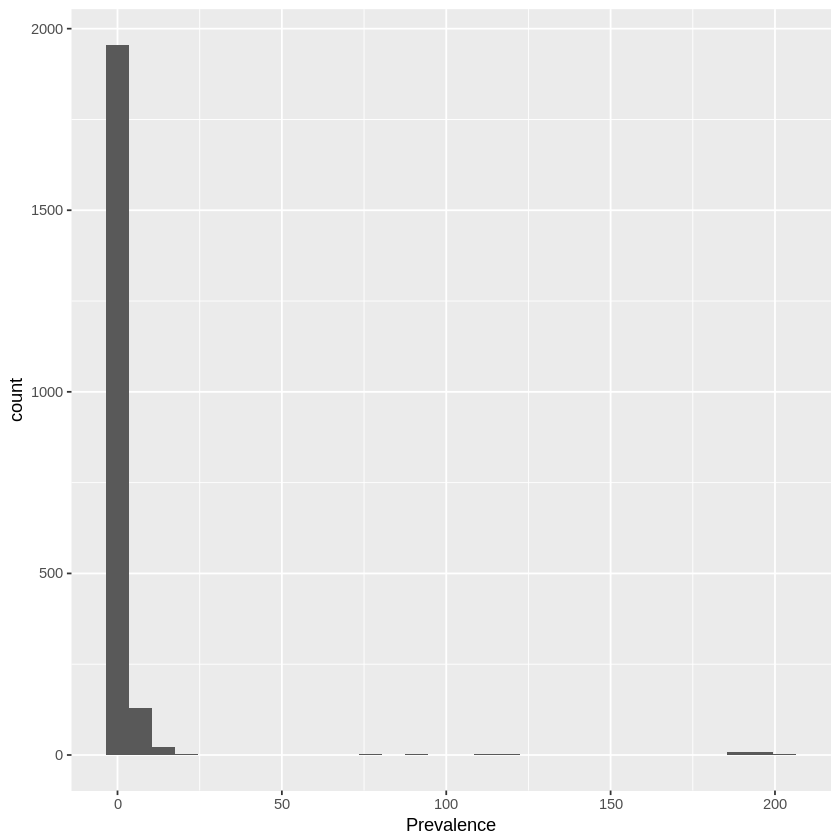

In [37]:
ggplot(myDataPRE, aes(Prevalence)) + geom_histogram()

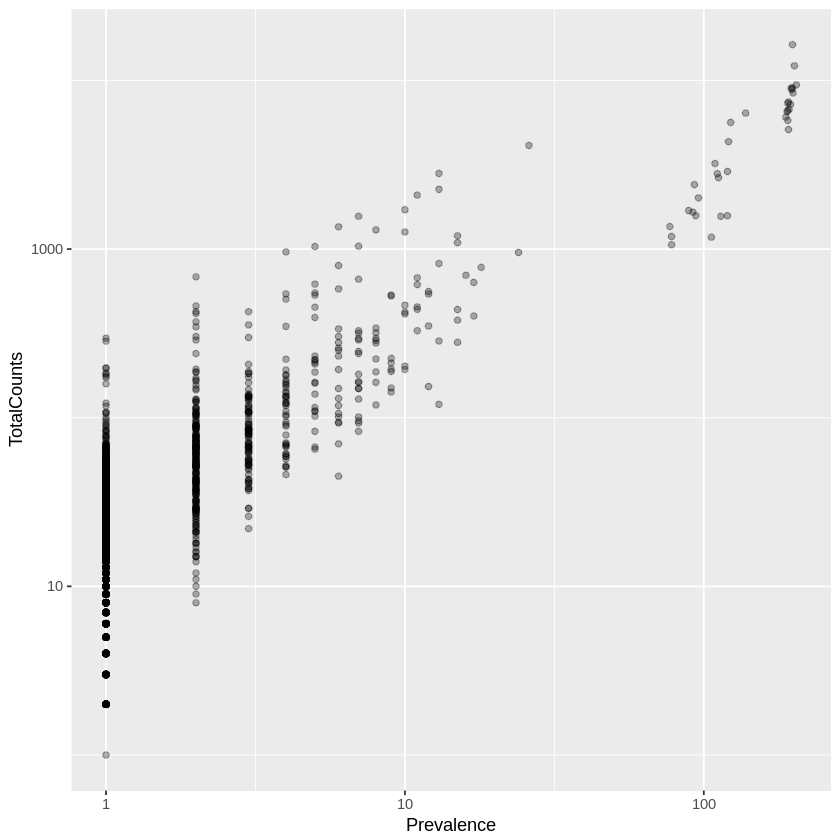

In [38]:
ggplot(myDataPRE, aes(Prevalence, TotalCounts)) + geom_point(alpha = 0.3) + scale_y_log10() + scale_x_log10()

In [39]:
# Get the most abundance 5 phyla, and then redo the scatter plot
nPhylum <- 5
#myDataPRE %>% 
#    group_by(Phylum) %>% 
#    summarise(n = n()) %>% 
#    arrange(desc(n))

top5Phylum <- myDataPRE %>% 
    group_by(Phylum) %>% 
    summarise(n = n()) %>% 
    arrange(desc(n)) %>% 
    top_n(nPhylum, n) %>%
    pull(Phylum)
top5Phylum

[1] Proteobacteria Actinobacteria Bacteroidetes  Acidobacteria  Chloroflexi   
26 Levels: [Parvarchaeota] Acidobacteria Actinobacteria ... WS3

In [40]:
myDataPRE_TOP5 <- myDataPRE %>%
    filter(Phylum %in% top5Phylum)
myDataPRE_TOP5

Prevalence,TotalCounts,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,10,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,NA,NA
3,81,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,4,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,3,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,3,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,13,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,36,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,33,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,4,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum
1,4,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,mitochondria,Pythium,ultimum


Warning message:
“Removed 35 rows containing missing values (geom_point).”

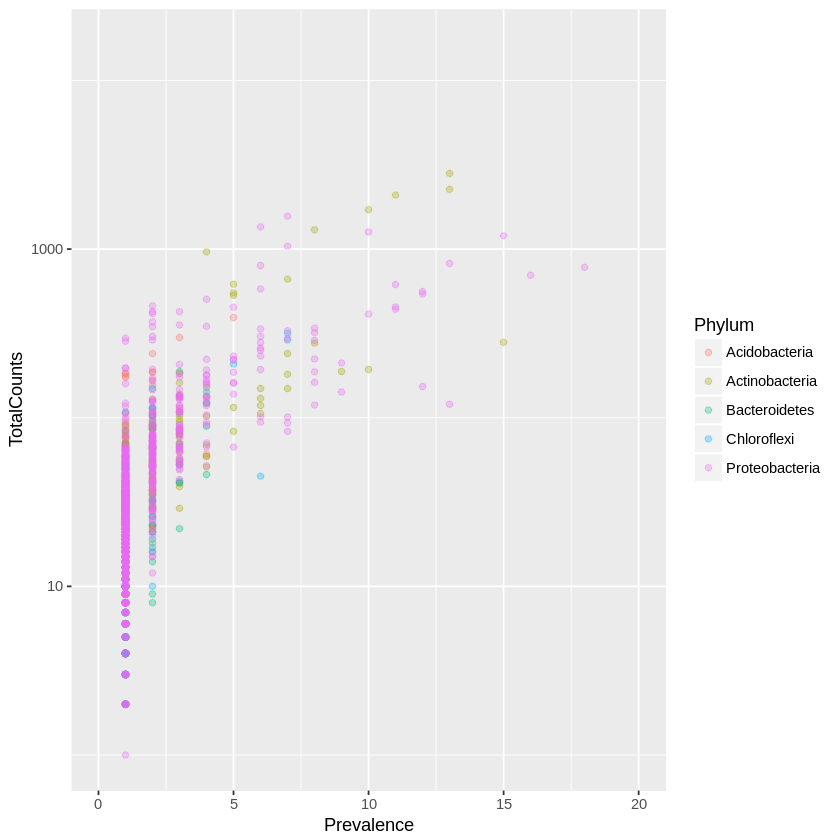

In [41]:
ggplot(myDataPRE_TOP5, aes(Prevalence, TotalCounts, color = Phylum)) + geom_point(alpha = 0.3) + scale_y_log10() + xlim(0,20)

### Bar plot

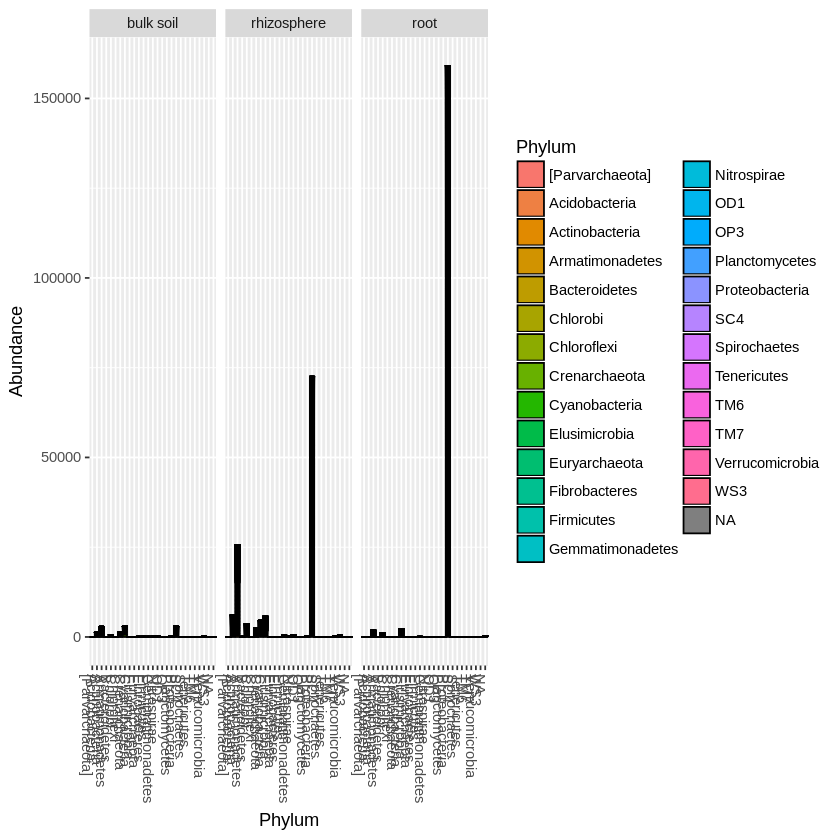

In [42]:
# plot_bar
plot_bar(myData, x = "Phylum", fill = "Phylum", facet_grid = ~Type)

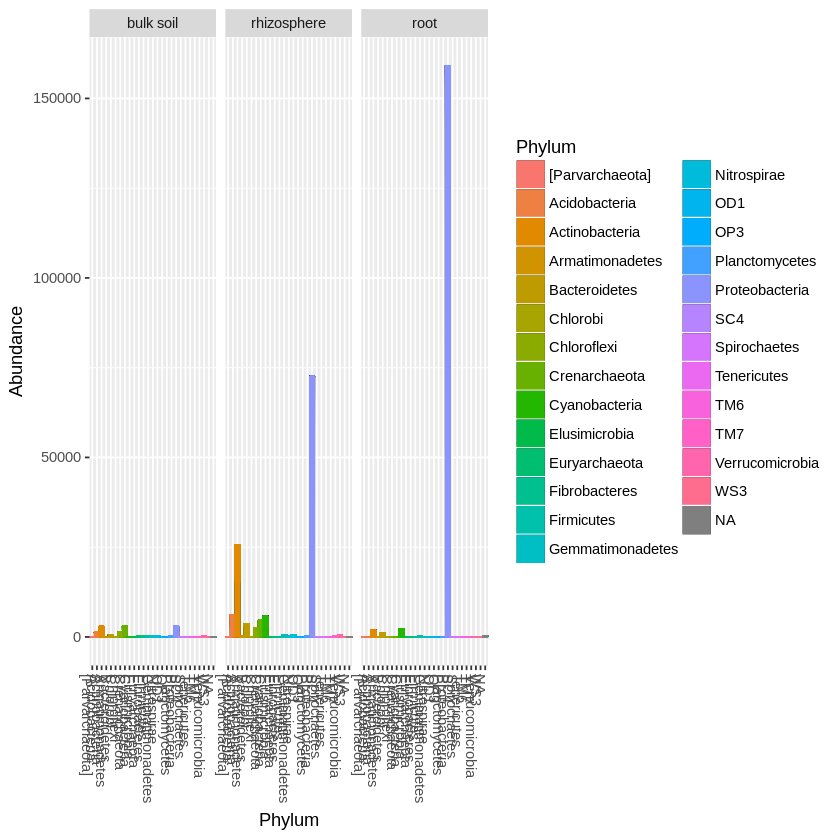

In [43]:
plot_bar(myData, x = "Phylum", fill = "Phylum", facet_grid = ~Type) +
    geom_bar(aes(color = Phylum, fill = Phylum), stat = "identity", position = "stack")

In [44]:
# Plot particular Phylum
myDataPhylum <- subset_taxa(myData, Phylum == "Acidobacteria")

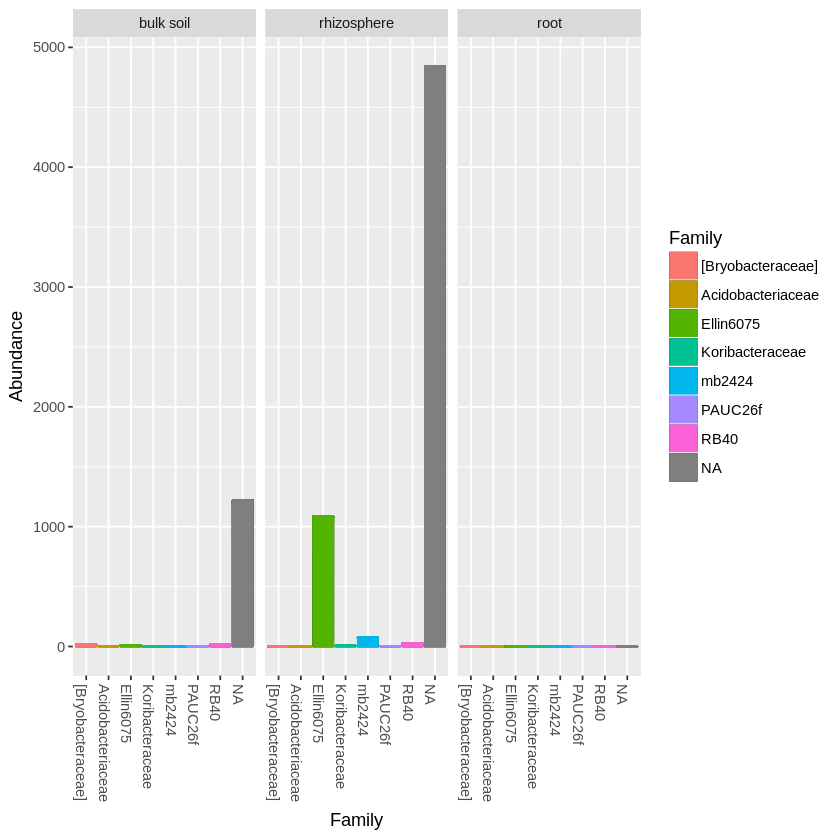

In [45]:
plot_bar(myDataPhylum, x = "Family", fill = "Family", facet_grid = ~Type) +
    geom_bar(aes(color = Family, fill = Family), stat = "identity", position = "stack")

In [46]:
# Plot the top 5
myDataTop5 <- subset_taxa(myData, Phylum %in% top5Phylum)

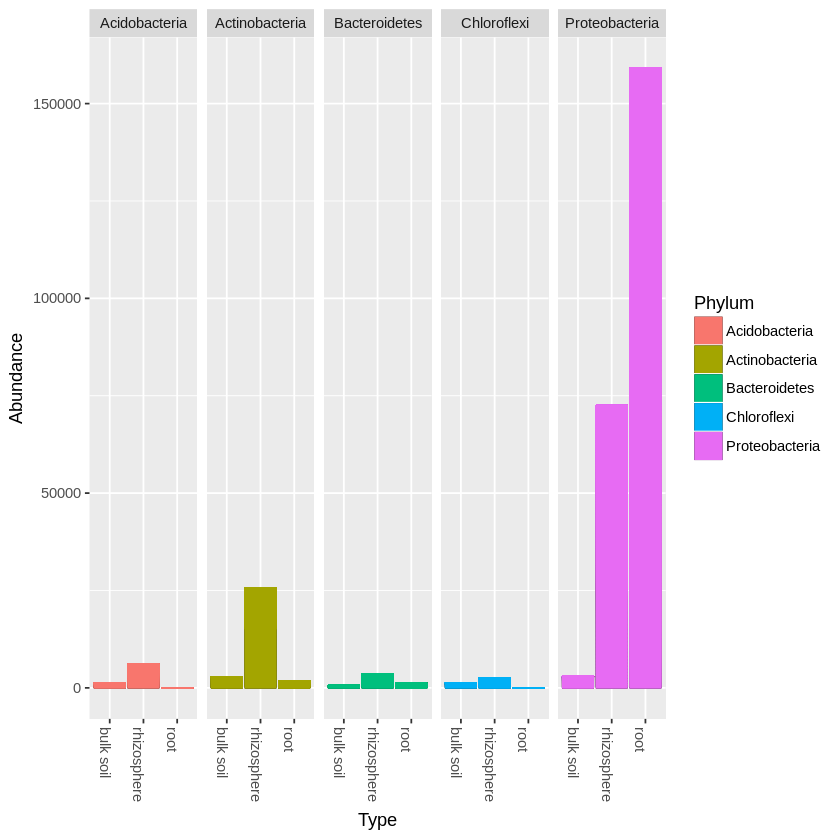

In [47]:
plot_bar(myDataTop5, x = "Type", fill = "Phylum", facet_grid = ~Phylum) +
    geom_bar(aes(color = Phylum, fill = Phylum), stat = "identity", position = "stack")

In [48]:
# Plot the relative abundance
myDataRtemp <- transform_sample_counts(myDataTop5, function(x) x / sum(x) )

Warning message:
“Removed 10626 rows containing missing values (position_stack).”Warning message:
“Removed 10626 rows containing missing values (position_stack).”

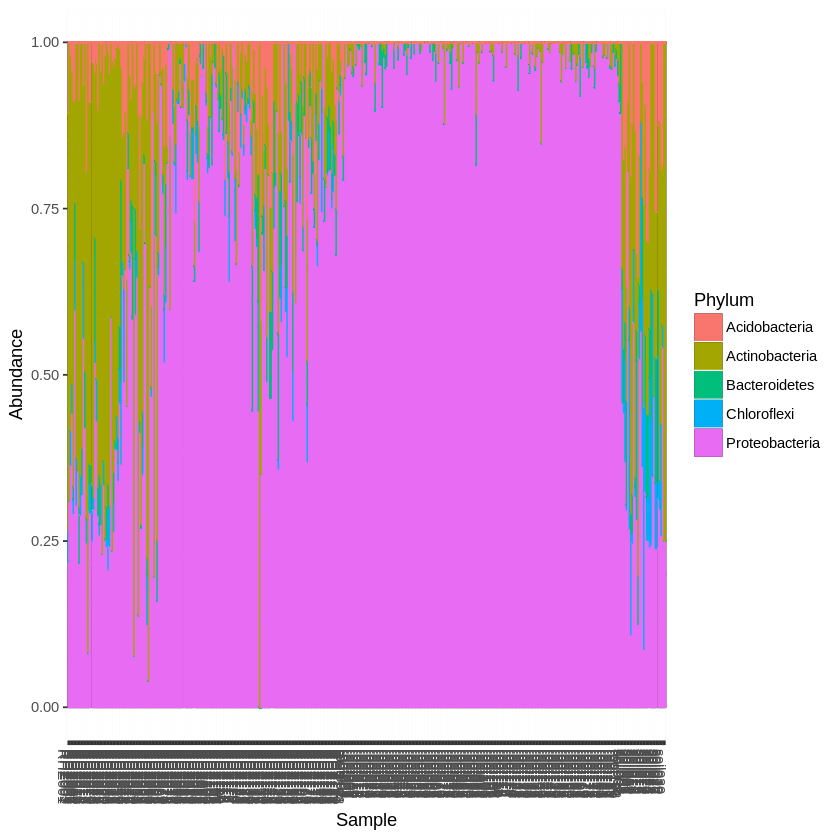

In [49]:
plot_bar(myDataRtemp, x = "Sample", fill = "Phylum") +
    geom_bar(aes(color = Phylum, fill = Phylum), stat = "identity", position = "stack")

# Remove top most abundance Phylum and re plot the figures

In [50]:
phyRemoved <- c("", "OD1", "OP3", "SC4", "TM6", "TM7", "WS3", "Proteobacteria")
myDataTopRemoved <- subset_taxa(myData, !is.na(Phylum) & !(Phylum %in% phyRemoved))

In [51]:
myDataTopRemoved <- subset_samples(myDataTopRemoved, Type == "bulk soil")

In [52]:
myDataTopRemoved <- subset_samples(myDataTopRemoved, sample_sums(myDataTopRemoved) > 0)

In [53]:
myDataTopRemoved

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1112 taxa and 29 samples ]
sample_data() Sample Data:       [ 29 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 1112 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1112 tips and 1045 internal nodes ]
refseq()      DNAStringSet:      [ 1112 reference sequences ]

In [54]:
myDataTopRemoved.RT <- transform_sample_counts(myDataTopRemoved, function(x) x / sum(x) )

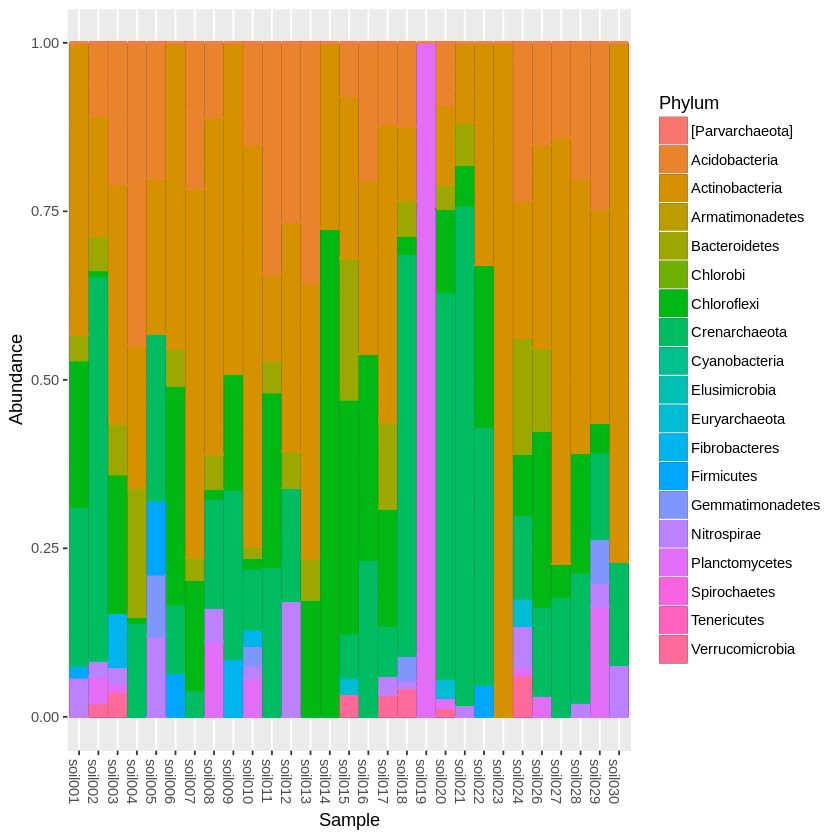

In [55]:
plot_bar(myDataTopRemoved.RT, x = "Sample", fill = "Phylum") +
    geom_bar(aes(color = Phylum, fill = Phylum), stat = "identity", position = "stack")

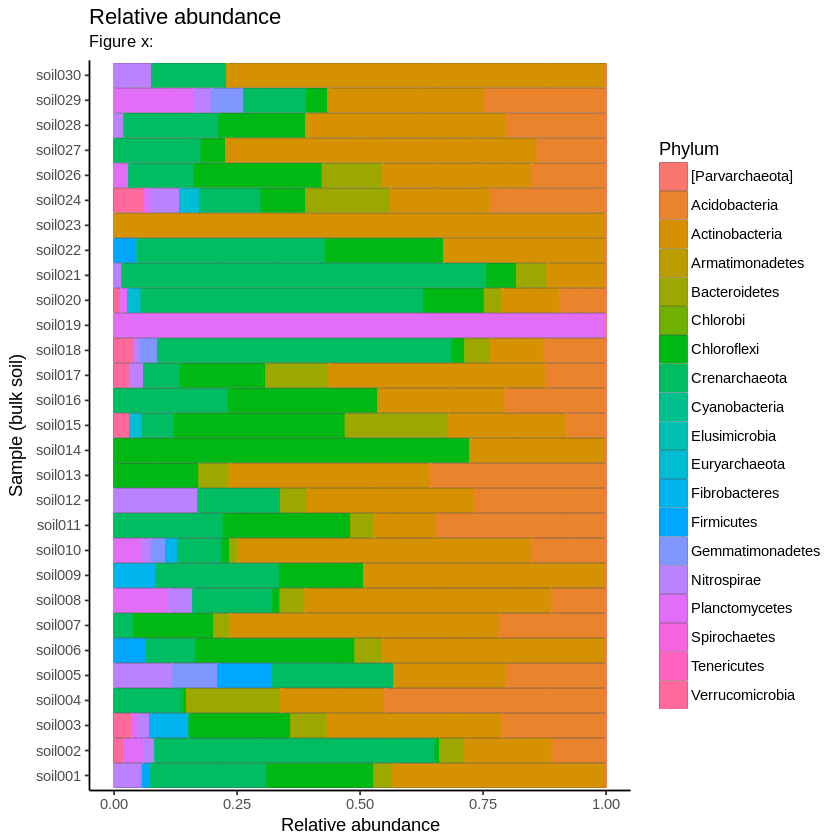

In [56]:
plot_bar(myDataTopRemoved.RT, x = "Sample", fill = "Phylum", ) +
    geom_bar(aes(color = Phylum, fill = Phylum), stat = "identity", position = "stack") +
    labs(title = "Relative abundance", subtitle = "Figure x:", x = "Sample (bulk soil)", y = "Relative abundance") +
    coord_flip() +
    theme_classic()

### Alpha Diversity (Before filtering)


In [57]:
?plot_richness

Warning message:
“Removed 833 rows containing missing values (geom_errorbar).”

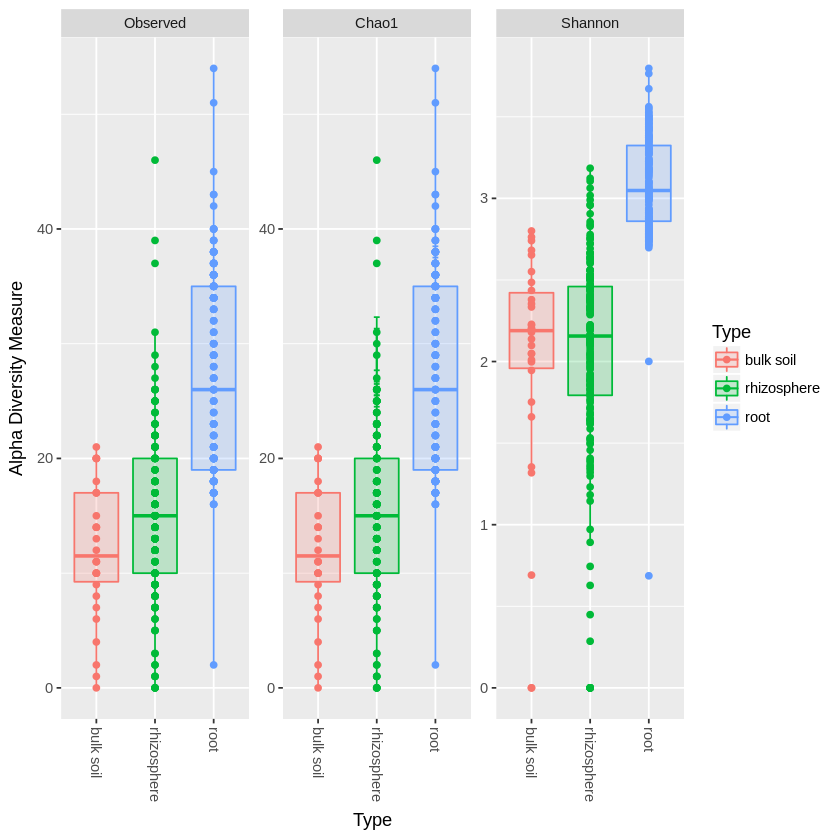

In [58]:
# indices <- c("Observed", "Chao1", "ACE", "Shannon", "Simpson", "InvSimpson", "Fisher")
indices <- c("Observed", "Chao1", "Shannon")
plot_richness(myData, x= "Type", color = "Type", measures = indices) +
    geom_boxplot(aes(fill = Type), alpha = 0.2)

In [59]:
p <- plot_richness(myData, x = "Type", color = "Type", measures = indices) +
    geom_jitter(aes(color = Type), alpha = 0.5, size = 2)

In [60]:
p$layers

[[1]]
geom_point: na.rm = TRUE
stat_identity: na.rm = TRUE
position_identity 

[[2]]
mapping: ymax = value + se, ymin = value - se 
geom_errorbar: na.rm = FALSE, width = 0.1
stat_identity: na.rm = FALSE
position_identity 

[[3]]
mapping: colour = Type 
geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_jitter 


In [61]:
p$layers <- p$layers[-(1:2)]

In [62]:
p$layers

[[1]]
mapping: colour = Type 
geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_jitter 


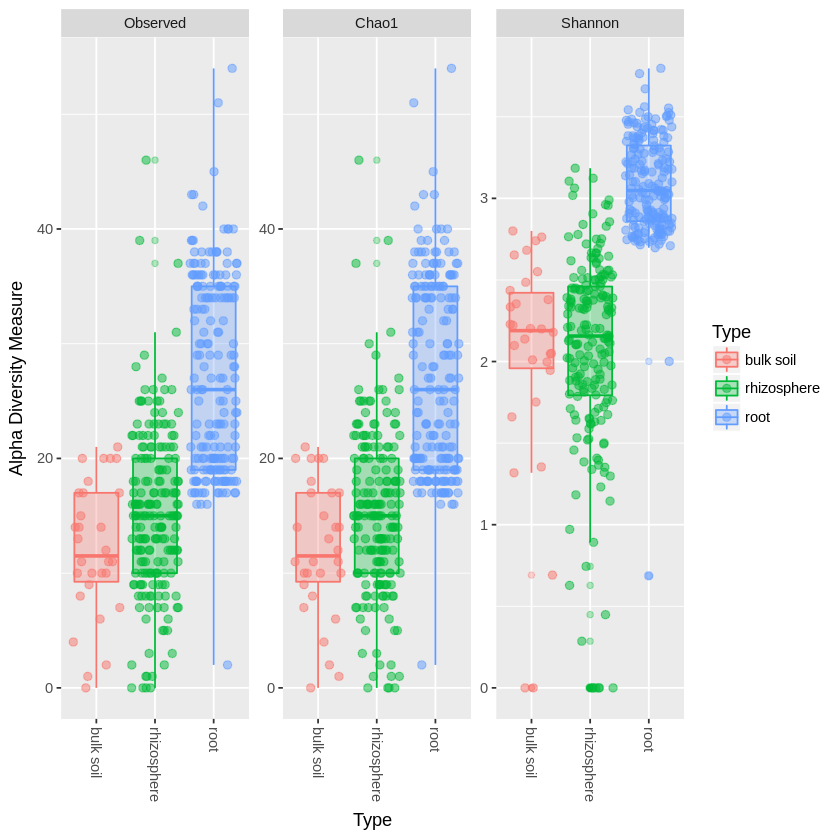

In [63]:
p + geom_boxplot(aes(fill = Type), alpha = 0.3)

Warning message:
“Removed 833 rows containing missing values (geom_errorbar).”

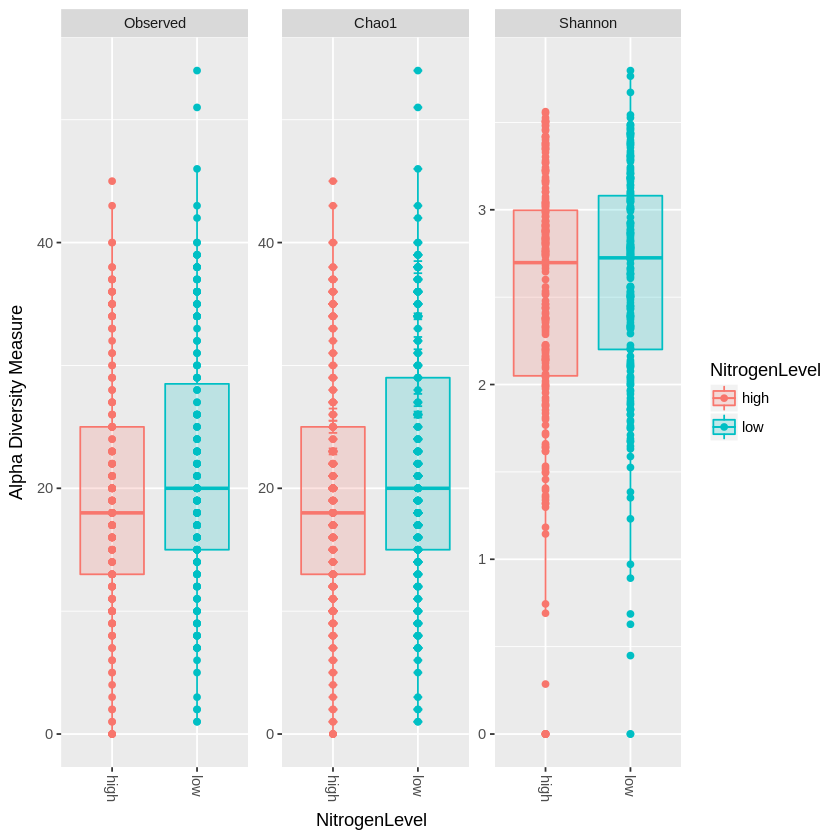

In [64]:
plot_richness(myData, x= "NitrogenLevel", color = "NitrogenLevel", measures = indices) +
    geom_boxplot(aes(fill = NitrogenLevel),alpha = 0.2)

In [65]:
#get the information 
alphaDiversity <- estimate_richness(myData, measures = indices)

In [66]:
alphaDiversity %>% rownames_to_column() %>% arrange(desc(Observed)) %>% head()

rowname,Observed,Chao1,se.chao1,Shannon
root043,54,54,0,3.796719
root038,51,51,0,3.764762
RHZ192,46,46,0,3.184854
root080,45,45,0,3.453222
root003,43,43,0,3.553372
root180,43,43,0,3.671682


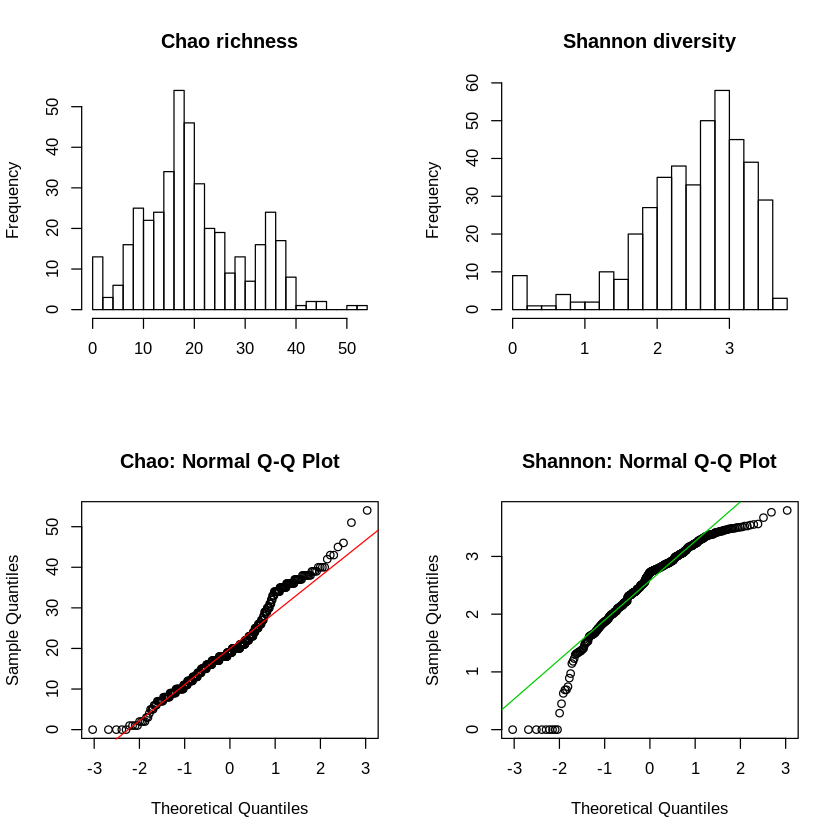

In [67]:
# Check the distribution
par(mfrow = c(2, 2))
hist(alphaDiversity$Chao1, main = "Chao richness", xlab = "", breaks = 20)
hist(alphaDiversity$Shannon, main = "Shannon diversity", xlab = "", breaks = 20)
qqnorm(alphaDiversity$Chao1, main = "Chao: Normal Q-Q Plot")
qqline(alphaDiversity$Chao1, col = 2)
qqnorm(alphaDiversity$Shannon, main = "Shannon: Normal Q-Q Plot")
qqline(alphaDiversity$Shannon, col = 3)

In [68]:
#Normality test using Shapiro-Wilk’s test
shapiro.test(alphaDiversity$Chao1)
shapiro.test(alphaDiversity$Shannon)


	Shapiro-Wilk normality test

data:  alphaDiversity$Chao1
W = 0.97146, p-value = 3.073e-07



	Shapiro-Wilk normality test

data:  alphaDiversity$Shannon
W = 0.92076, p-value = 5.86e-14


In [69]:
# run Kruskal-Wallis test
alphaDiversity.Sample <- alphaDiversity %>% 
    rownames_to_column() %>%
    left_join(sample_data(myData), by = c("rowname" = "X.SampleID")) 

Warning message:
“Column `rowname`/`X.SampleID` joining character vector and factor, coercing into character vector”

In [70]:
head(alphaDiversity.Sample)

rowname,Observed,Chao1,se.chao1,Shannon,BarcodeSequence,LinkerPrimerSequence,ReversePrimer,Genotype,Replicate,Type,GrowthStage,Time,NitrogenLevel,Description
RHZ001,26,26,0.4902903,2.286962,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,A,1,rhizosphere,Q,40,high,RHZ_001
RHZ002,12,12,0.0000000,1.712433,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,B,1,rhizosphere,Q,40,high,RHZ_002
RHZ003,23,23,0.2445048,2.224462,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,C,1,rhizosphere,Q,40,high,RHZ_003
RHZ004,21,21,0.0000000,2.300774,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,D,1,rhizosphere,Q,40,high,RHZ_004
RHZ005,22,22,0.0000000,2.312784,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,A,2,rhizosphere,Q,40,high,RHZ_005
RHZ006,26,26,0.0000000,3.123197,,GTGCCAGCMGCCGCGGTAA,GGACTACHVGGGTWTCTAAT,B,2,rhizosphere,Q,40,high,RHZ_006


In [71]:
alphaDiversity.Sample %>%
    kruskal.test(Chao1 ~ Type, data=.)

alphaDiversity.Sample %>%
    kruskal.test(Shannon ~ Type, data=.)


	Kruskal-Wallis rank sum test

data:  Chao1 by Type
Kruskal-Wallis chi-squared = 175.14, df = 2, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  Shannon by Type
Kruskal-Wallis chi-squared = 269.32, df = 2, p-value < 2.2e-16


In [72]:
# Multiple pairwise-comparison between groups
pairwise.wilcox.test(alphaDiversity.Sample$Chao1, alphaDiversity.Sample$Type, p.adjust.method = "BH")
pairwise.wilcox.test(alphaDiversity.Sample$Shannon, alphaDiversity.Sample$Type, p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  alphaDiversity.Sample$Chao1 and alphaDiversity.Sample$Type 

            bulk soil rhizosphere
rhizosphere 0.031     -          
root        2.6e-14   < 2e-16    

P value adjustment method: BH 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  alphaDiversity.Sample$Shannon and alphaDiversity.Sample$Type 

            bulk soil rhizosphere
rhizosphere 0.98      -          
root        <2e-16    <2e-16     

P value adjustment method: BH 

In [73]:
# ANOVA
aovChao <- alphaDiversity.Sample %>%
    aov(Chao1 ~ Type, .)
aovShannon <- alphaDiversity.Sample %>%
    aov(Shannon ~ Type, .)
summary(aovChao)
summary(aovShannon)

             Df Sum Sq Mean Sq F value Pr(>F)    
Type          2  16133    8067   133.4 <2e-16 ***
Residuals   411  24845      60                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             Df Sum Sq Mean Sq F value Pr(>F)    
Type          2  109.6   54.80   198.9 <2e-16 ***
Residuals   411  113.2    0.28                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [74]:
TukeyHSD(aovChao)
TukeyHSD(aovShannon)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Chao1 ~ Type, data = .)

$Type
                           diff        lwr       upr     p adj
rhizosphere-bulk soil  3.136458 -0.4539866  6.726903 0.1007162
root-bulk soil        15.131250 11.5408051 18.721695 0.0000000
root-rhizosphere      11.994792 10.1282082 13.861375 0.0000000


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Shannon ~ Type, data = .)

$Type
                            diff        lwr       upr     p adj
rhizosphere-bulk soil 0.04353681 -0.1988368 0.2859104 0.9063168
root-bulk soil        1.06918593  0.8268123 1.3115595 0.0000000
root-rhizosphere      1.02564912  0.8996451 1.1516531 0.0000000


### Beta Diversity
Both distances are sensitive to differences in total counts, we need 
use the relative abundance here.

In [75]:
?plot_ordination

In [76]:
# Filtering
myData.2 <- prune_samples(sample_sums(myData) > 0, myData)
phyRemoved <- c("", "OD1", "OP3", "SC4", "TM6", "TM7", "WS3")
myData.2 <- subset_taxa(myData.2, !is.na(Phylum) & !Phylum %in% phyRemoved)
myData.2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2091 taxa and 409 samples ]
sample_data() Sample Data:       [ 409 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 2091 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2091 tips and 1947 internal nodes ]
refseq()      DNAStringSet:      [ 2091 reference sequences ]

In [77]:
myData.2.t <- transform_sample_counts(myData.2, function(x) x / sum(x) )
myData.2.ft <- filter_taxa(myData.2.t, function(x) var(x) > 1e-5, TRUE)

In [78]:
myData.2.ft

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 582 taxa and 409 samples ]
sample_data() Sample Data:       [ 409 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 582 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 582 tips and 535 internal nodes ]
refseq()      DNAStringSet:      [ 582 reference sequences ]

In [79]:
myData.2.ft.ord <- ordinate(myData.2.ft, method = "NMDS", distance = "bray")

Run 0 stress 0.008551364 
Run 1 stress 0.00556878 
... New best solution
... Procrustes: rmse 0.0256152  max resid 0.2797613 
Run 2 stress 0.004264291 
... New best solution
... Procrustes: rmse 0.02212086  max resid 0.2976062 
Run 3 stress 0.004249099 
... New best solution
... Procrustes: rmse 0.03553954  max resid 0.4905988 
Run 4 stress 0.004084816 
... New best solution
... Procrustes: rmse 0.02533577  max resid 0.3429572 
Run 5 stress 0.004355307 
... Procrustes: rmse 0.04174586  max resid 0.6094864 
Run 6 stress 0.004598036 
Run 7 stress 0.004606291 
Run 8 stress 0.005313664 
Run 9 stress 0.004713183 
Run 10 stress 0.006841386 
Run 11 stress 0.005631208 
Run 12 stress 0.005568465 
Run 13 stress 0.00494401 
Run 14 stress 0.004344358 
... Procrustes: rmse 0.04521255  max resid 0.7038937 
Run 15 stress 0.007624564 
Run 16 stress 0.006815808 
Run 17 stress 0.005952951 
Run 18 stress 0.008025451 
Run 19 stress 0.004370807 
... Procrustes: rmse 0.04131008  max resid 0.5989158 
Run 20 

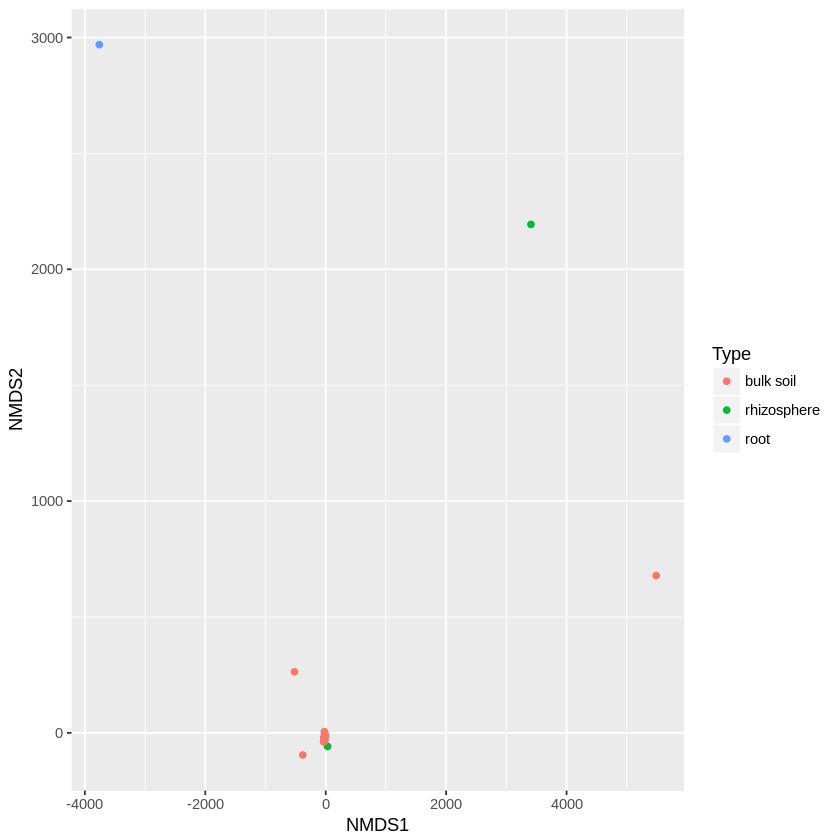

In [80]:
# Samples
plot_ordination(myData.2.ft, myData.2.ft.ord, type = "samples", color="Type")

In [81]:
myData.2.ft.wuf <- ordinate(myData.2.ft, method = "PCoA", distance ="wunifrac")

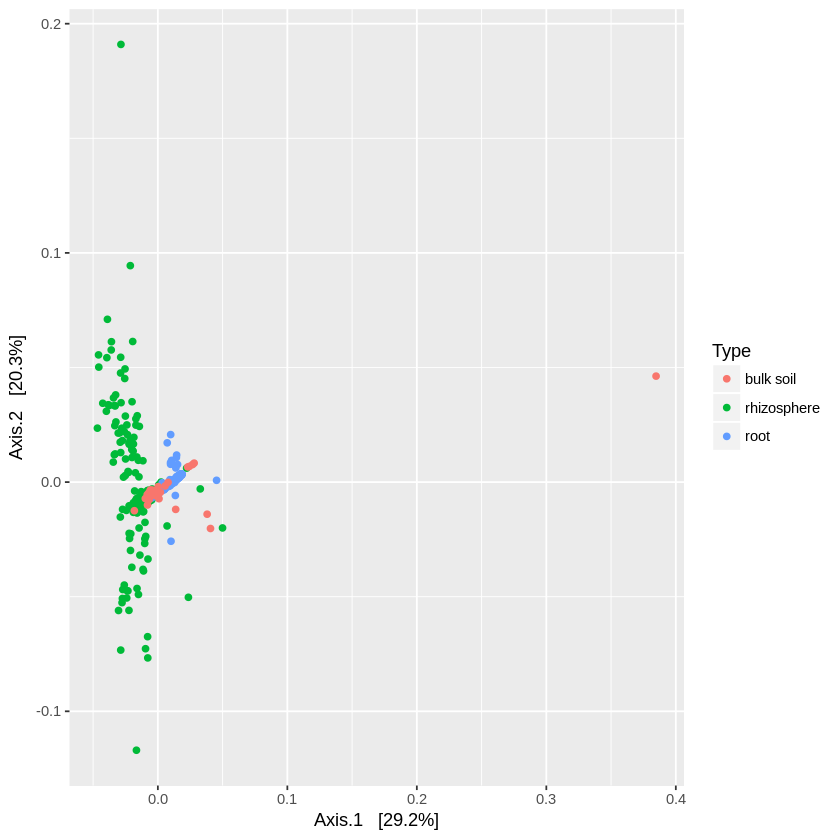

In [82]:
plot_ordination(myData.2.ft, myData.2.ft.wuf, color = "Type")

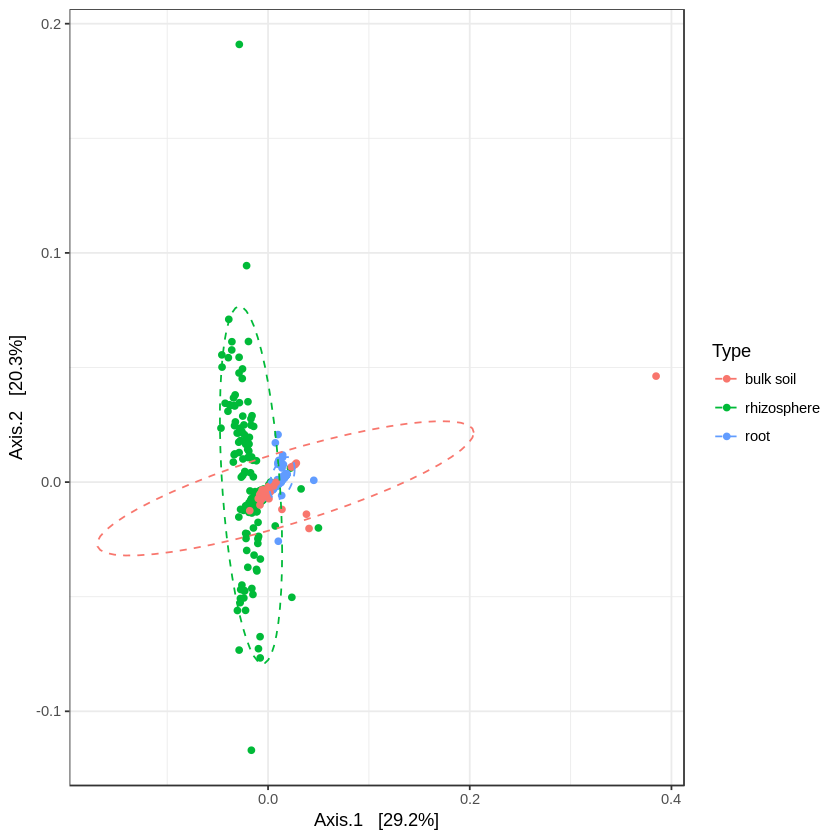

In [83]:
plot_ordination(myData.2.ft, myData.2.ft.wuf, color = "Type") + 
    stat_ellipse(type = "norm", linetype = 2) +
    theme_bw()

### plot_tree

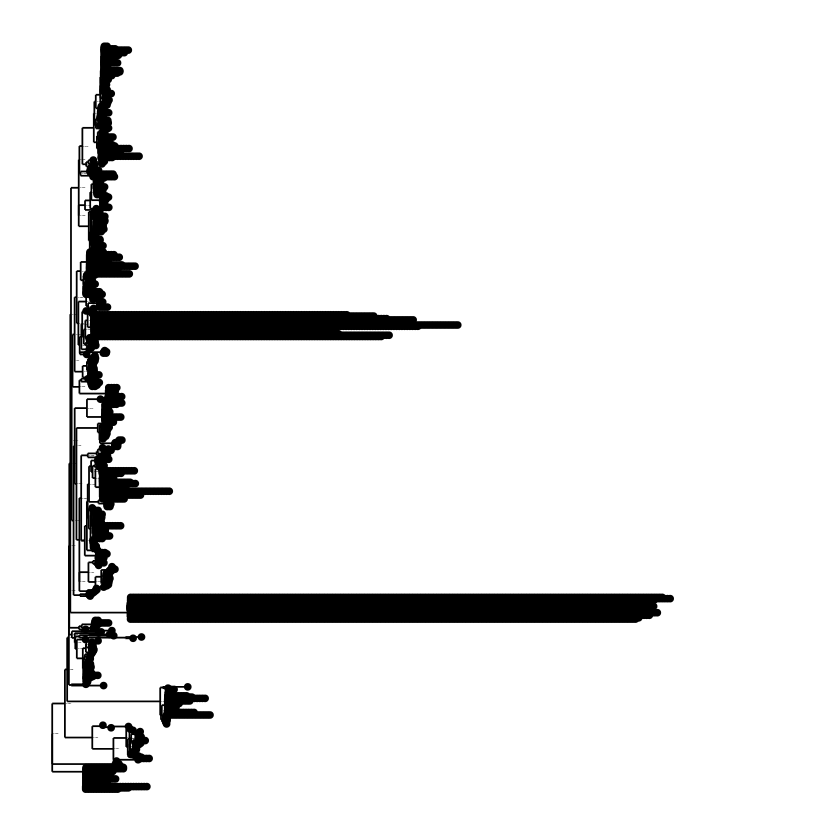

In [84]:
plot_tree(myData.2.ft)

In [85]:
myData.2.ft.g = tax_glom(myData.2.ft, "Phylum")
myData.2.ft.g

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11 taxa and 409 samples ]
sample_data() Sample Data:       [ 409 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 11 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 11 tips and 10 internal nodes ]
refseq()      DNAStringSet:      [ 11 reference sequences ]

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 11. Consider
specifying shapes manually if you must have them.”

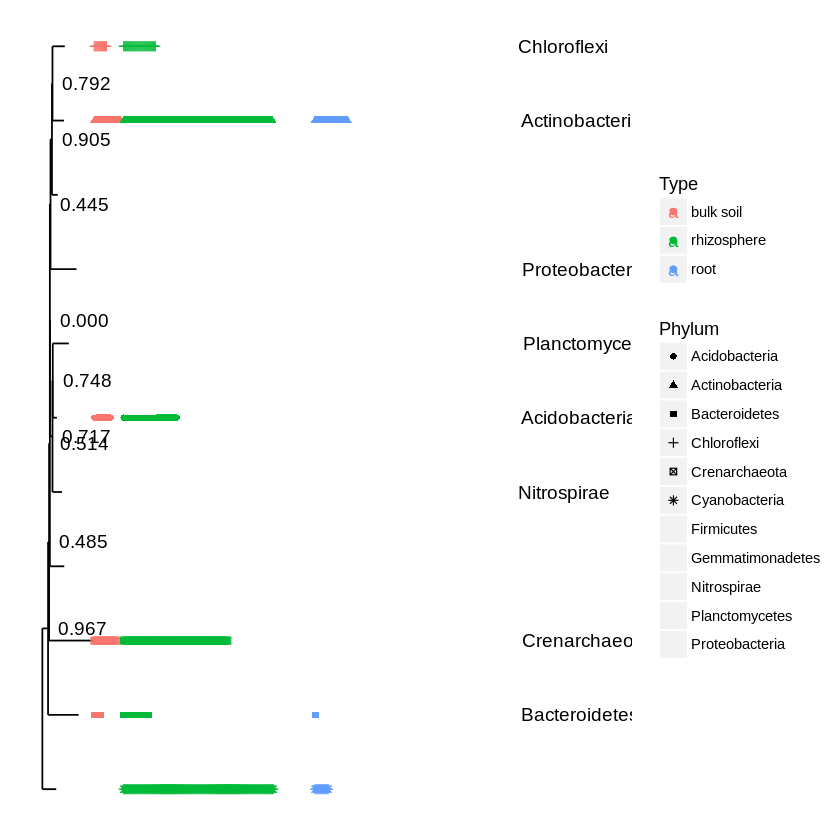

In [86]:
plot_tree(myData.2.ft.g, color = "Type", shape = "Phylum", ladderize = "left", justify = "left", label.tips = "Phylum")

### References:
Waste Not, Want Not: Why Rarefying Microbiome Data Is Inadmissible

[Phyloseq tutorial](http://joey711.github.io/phyloseq/index.html)


